https://xuanshay.github.io

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

# Project: Video game sales

Group Memebers: Yuxuan Zhang, Haowen Weng

The project aims to dig into the market of video games. The projects investigares tendencies and conclusions about the video game industries.


---

### Datasets:
* Video Games Sales  
    * Downloaded from https://www.kaggle.com/gregorut/videogamesales  
    * The dataset contains a list of video games with sales greater than 100,000 copies. The release year of the games are between 1980 and 2020
* Steam database
    * Scraped from https://store.steampowered.com/stats/
    * The website introduced games with most steam users. It includes both current players and the peak of the day.
* Previous Steam Games Ranking
    * Downloaded from https://www.kaggle.com/michau96/popularity-of-games-on-steam/version/6
    * Th data shows the top trending games with most players of previous years

---

### Purpose and Questions:
* Game production companies' preformance in 21th century.
* Players' taste in different region 
* The lifttime of a game


---

## Data Generalization, Extraction, Transfrom, and Load

In [2]:
!pip install beautifulsoup4
!pip install requests
!pip install pandas
!pip install numpy
!pip install html5lib
!pip3 install lxml

!pip install html5lib

In [3]:
!pip install html5lib

In [4]:
#%matplotlib inline
import numpy as np
import pandas as pd
import requests
import numpy
import lxml
from bs4 import BeautifulSoup
import re
import html5lib

### Data Set 1: Video Games Slaes

Our dataset is generated by a scrape of [VGChartz](https://www.vgchartz.com/). It contains a list of video games with sales greater than 100,000 copies in worldwide.

Notice: 1.) Sales are in millions. 2.)Data collected from 2017

In [5]:
vgs = pd.read_csv("vgsales.csv")
vgs.head(50)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# The struggle between producers

To find out the main stream tendency of gaming industries, we better first take a look on publishing companies, Let's overview the performance of all the manufacturers since 2000.

In [6]:
recent_game = vgs.loc[vgs["Year"]>2000]
recent_game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


<AxesSubplot:ylabel='Global_Sales'>

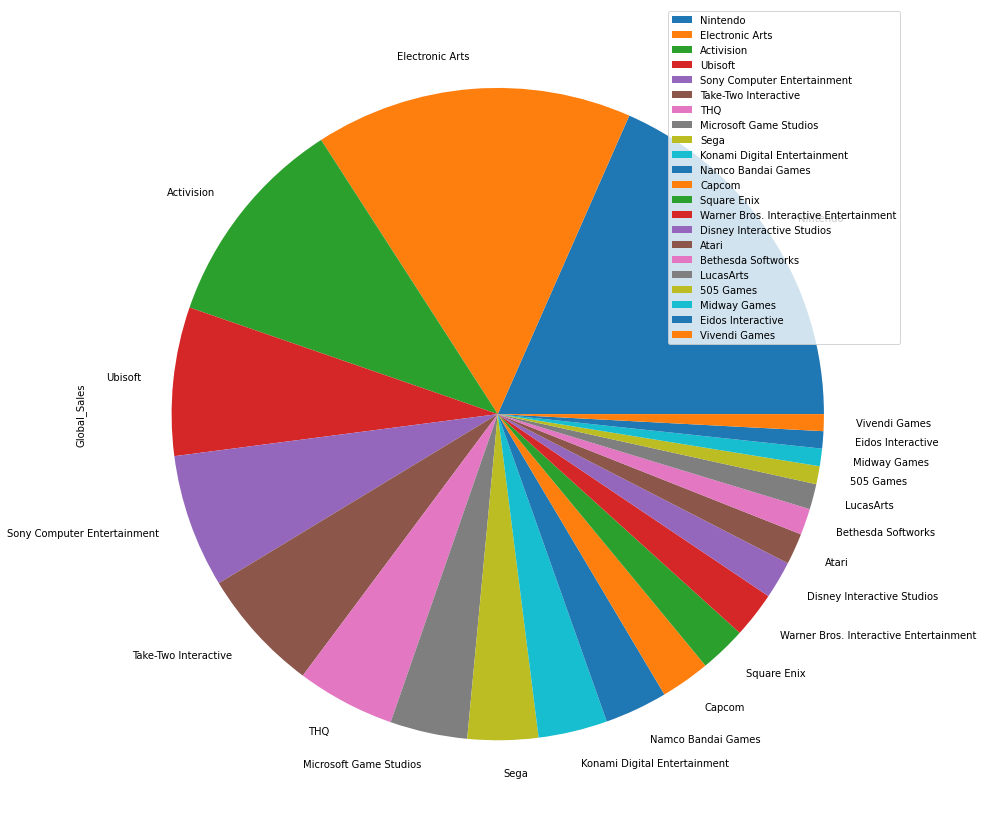

In [7]:
companies = recent_game.groupby("Publisher").sum().sort_values("Global_Sales",ascending=False)
del companies["Year"]
del companies["Rank"]
top_tier = companies.loc[companies["Global_Sales"]>50]
top_tier.plot.pie(y="Global_Sales",figsize=(15, 15))

However, this chart conclude all sales from 2000 till now, to investigate the performance macroscopically, we want to know the flowing of sales over periods. 

Let's set the period to 4 years. We can divide the periods into 2000-2003, 2004-2008, 2009-2012, 2013-2016, respectively called q1,q2,q3,q4

In [8]:
q1 = recent_game.loc[recent_game["Year"]<2004]

q2 = recent_game.loc[recent_game["Year"]<2009]
q2 = q2.loc[recent_game["Year"]>2003]

q3 = recent_game.loc[recent_game["Year"]>2008]
q3 = q3.loc[recent_game["Year"]<2013]

q4 = recent_game.loc[recent_game["Year"]>2012]

In [9]:
company_q1 = q1.groupby("Publisher").sum().sort_values("Global_Sales",ascending=False).loc[:,["Global_Sales"]]
company_q2 = q2.groupby("Publisher").sum().sort_values("Global_Sales",ascending=False).loc[:,["Global_Sales"]]
company_q2 = q3.groupby("Publisher").sum().sort_values("Global_Sales",ascending=False).loc[:,["Global_Sales"]]
company_q4 = q4.groupby("Publisher").sum().sort_values("Global_Sales",ascending=False).loc[:,["Global_Sales"]]

In [10]:
#draw a bump chart
recent_companies = company_q1
recent_companies = recent_companies.reset_index()
recent_companies

,Publisher,Global_Sales
0,Electronic Arts,187.96
1,Nintendo,131.82
2,Sony Computer Entertainment,93.46
3,THQ,78.51
4,Activision,65.91
...,...,...
132,Princess Soft,0.02
133,King Records,0.02
134,JoWood Productions,0.02
135,Datam Polystar,0.02


CONLUSION HERE>

# The taste between players

Question2: Is there a difference in consumer's preference throughout different regions?

Let's first look at each different region 

<AxesSubplot:ylabel='NA_Sales'>

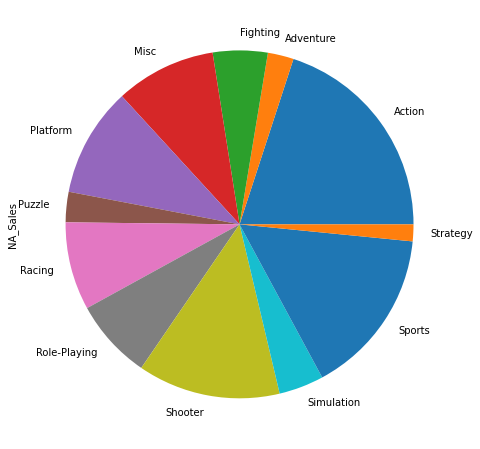

In [11]:
#NA
NA_genre= vgs.groupby("Genre")["NA_Sales"].sum()
NA_genre.plot.pie(figsize=(8, 8))

<AxesSubplot:ylabel='EU_Sales'>

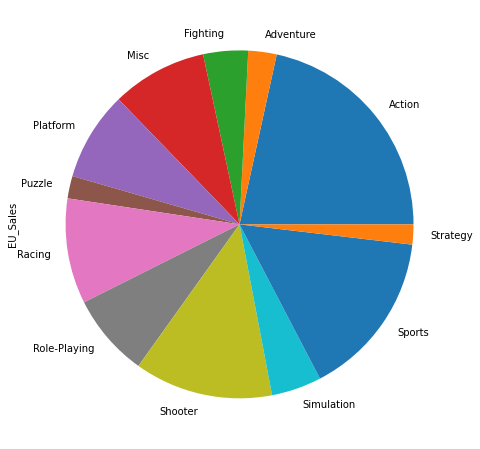

In [12]:
#EU
EU_genre = vgs.groupby("Genre")["EU_Sales"].sum()
EU_genre.plot.pie(figsize=(8, 8))

<AxesSubplot:ylabel='JP_Sales'>

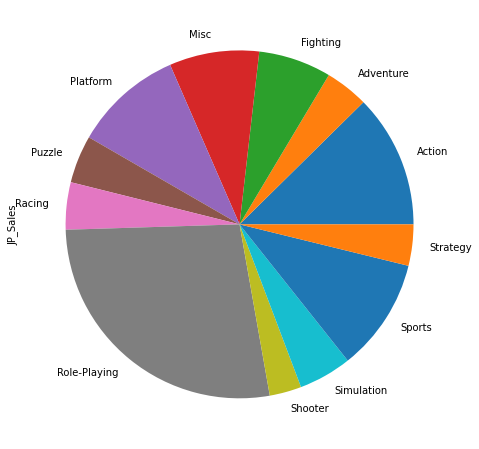

In [13]:
#JP
JP_genre = vgs.groupby("Genre")["JP_Sales"].sum()
JP_genre.plot.pie(figsize=(8, 8))

<AxesSubplot:ylabel='Other_Sales'>

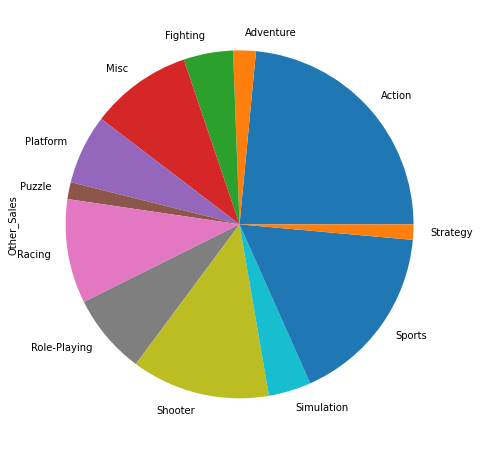

In [14]:
#Other region
OT_genre = vgs.groupby("Genre")["Other_Sales"].sum()
OT_genre.plot.pie(figsize=(8, 8))

After seeing every region's distribution, we have to compare the proportion of each type of games to see if a there's a dominated game genre around all regions. 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Average
Genre,,,,,
Action,0.199827,0.215683,0.123894,0.234886,0.193572
Sports,0.155556,0.154819,0.104855,0.169188,0.146105
Role-Playing,0.074501,0.077260,0.272893,0.074723,0.124844
Shooter,0.132622,0.128699,0.029651,0.128725,0.104924
Misc,0.093386,0.088730,0.083469,0.094416,0.090000
Platform,0.101765,0.082835,0.101292,0.064669,0.087640
Racing,0.081817,0.097936,0.043911,0.096860,0.080131
Fighting,0.050897,0.041625,0.067660,0.045979,0.051540
Simulation,0.041728,0.046579,0.049341,0.039511,0.044290


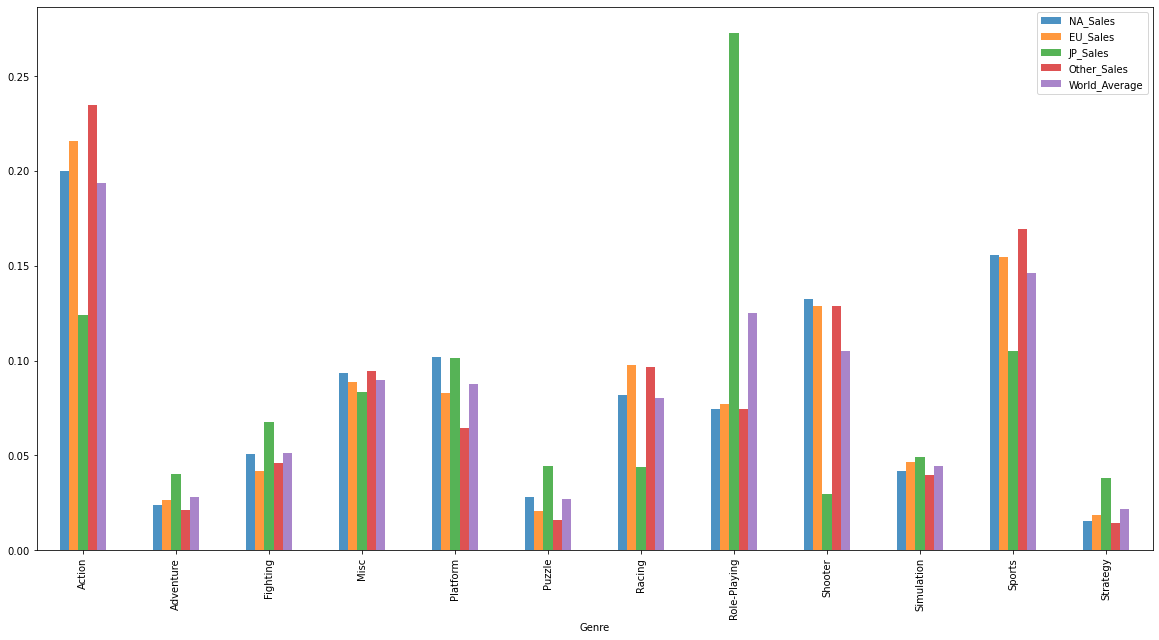

In [27]:
NA_genre_por = NA_genre/NA_genre.sum()
EU_genre_por = EU_genre/EU_genre.sum()
JP_genre_por = JP_genre/JP_genre.sum()
OT_genre_por = OT_genre/OT_genre.sum()
world_genre = NA_genre_por.to_frame().join(EU_genre_por).join(JP_genre_por).join(OT_genre_por)
world_genre["World_Average"]=(world_genre["NA_Sales"]+world_genre["EU_Sales"]+world_genre["JP_Sales"]+world_genre["Other_Sales"])/4
world_genre.plot.bar(alpha=0.8,figsize = (20,10))
world_genre.sort_values("World_Average",ascending=False)

That's very clear that what people in different region prefers.

Some conclusion:

1) Action Game(0.194) seems to be generally the most favored genre all around, second is sports(0.146) and third is role-playing(0.125)

3) Most minority types of game: Adventure(0.0280), Puzzle(0.0273), Strategy(0.0217). Reason perhaps will be the hardcore playing style.

2) Japaness people are indeed obsessed with the Role-playing, this might lead by the well-development of JRPG

### Data Set 2: Steam database

First, we scrap and generate the dataframe using several pandas functions

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get('https://store.steampowered.com/stats/',headers=header)
resource = response.text

In [ ]:
souped_resource = BeautifulSoup(resource,"html.parser")
prettify_resource = BeautifulSoup.prettify(souped_resource)
soup = BeautifulSoup(prettify_resource)
table_found = soup.find("div",{'id' : "detailStats"})

In [ ]:
table_found = re.sub("display: none;",'',str(table_found))

In [ ]:
table = pd.read_html(str(table_found))

In [ ]:
df_steam = pd.DataFrame(table[0])

In [ ]:
df_steam

In [ ]:
df_steam = df_steam.loc[2:]

In [ ]:
#drop blank columns
df_steam =df_steam.drop(columns = 2)
df_steam =df_steam.drop(columns = 4)

In [ ]:
#Set the columns index
df_steam.columns=['Current Players','Peak Today','Game']

In [ ]:
#set the name of the games throughtout all database the same 
df_steam['Game'][5] = 'PLAYERUNKNOWN\'S BATTLEGROUNDS'

In [ ]:
df_steam

### Data Set 3: Previous players count for games on steam


In [ ]:
# Read the csv file
df_previous_user = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SteamCharts.csv",encoding='latin1')
df_previous_user

---

## Find out the data we need from different datasets

For this part, we are going to find the ranking of top 100 games from 2016 till present.  
Afterwards, we will see the change on rankings and possibly find out a trend and the average years a game can be considered popular.  
In this part popular is defined as the number of players is in top 100




### A little formatting stuff for the scraped dataframe

In [ ]:
df_steam_now = df_steam

In [ ]:
df_steam_now = df_steam_now.reset_index(drop = True)

In [ ]:
# Add two columns:Year and Ranking for the data we scraped from steam(which is the present ranking)
i = 0
df_steam_now['Year'] = 2021
df_steam_now['Ranking'] = np.nan
for i in range(len(df_steam_now['Ranking'])):
  df_steam_now['Ranking'][i] = int(i+1)

In [ ]:
df_steam_now

In [ ]:
# drop Current Players and Peak Today as we don't need to compare these data later on
top_game = df_steam_now
del top_game['Current Players']
del top_game['Peak Today']

#set the index of top_game the same as df_previous_user
top_game.rename({'Game': 'gamename', 'Year': 'year'}, axis=1, inplace=True)
top_game

### Collect data from all database

For previous ranking, we are ranking them based on the average players.

#### 2020 Ranking

In [ ]:
data_2020 = df_previous_user.loc[(df_previous_user['year']==2020) & (df_previous_user['month']=="November ")]

#delete unrelated columns
del data_2020['gain']
del data_2020['peak']
del data_2020['avg_peak_perc']
del data_2020['month']

#sort by average players
data_2020 = data_2020.sort_values(by=['avg'],ascending= False)

#find top 100
data_2020 = data_2020[:100]

#reset index
data_2020 = data_2020.reset_index(drop= True)

#set ranking
i = 0
data_2020['Ranking'] = np.nan
for i in range(len(data_2020['Ranking'])):
  data_2020['Ranking'][i] = int(i+1)

# delete average players
del data_2020['avg']

In [ ]:
#append to top_game
top_game = top_game.append(data_2020)

#### 2019 Ranking

In [ ]:
data_2019 = df_previous_user.loc[(df_previous_user['year']==2019) & (df_previous_user['month']=="November ")]

#delete unrelated columns
del data_2019['gain']
del data_2019['peak']
del data_2019['avg_peak_perc']
del data_2019['month']

#sort by average players
data_2019 = data_2019.sort_values(by=['avg'],ascending= False)

#find top 100
data_2019 = data_2019[:100]

#reset index
data_2019 = data_2019.reset_index(drop= True)

#set ranking
i = 0
data_2019['Ranking'] = np.nan
for i in range(len(data_2019['Ranking'])):
  data_2019['Ranking'][i] = int(i+1)

# delete average players
del data_2019['avg']

In [ ]:
#append to top_game
top_game = top_game.append(data_2019)

#### 2018 Ranking

In [ ]:
data_2018 = df_previous_user.loc[(df_previous_user['year']==2018) & (df_previous_user['month']=="November ")]

#delete unrelated columns
del data_2018['gain']
del data_2018['peak']
del data_2018['avg_peak_perc']
del data_2018['month']	

#sort by average players
data_2018 = data_2018.sort_values(by=['avg'],ascending= False)

#find top 100
data_2018 = data_2018[:100]

#reset index
data_2018 = data_2018.reset_index(drop= True)

#set ranking
i = 0
data_2018['Ranking'] = np.nan
for i in range(len(data_2018['Ranking'])):
  data_2018['Ranking'][i] = int(i+1)

# delete average players
del data_2018['avg']
data_2018

In [ ]:
#append to top_game
top_game = top_game.append(data_2018)
top_game = top_game.reset_index(drop = True)

#### 2017 Ranking

In [ ]:
data_2017 = df_previous_user.loc[(df_previous_user['year']==2017) & (df_previous_user['month']=="November ")]

#delete unrelated columns
del data_2017['gain']
del data_2017['peak']
del data_2017['avg_peak_perc']
del data_2017['month']	

#sort by average players
data_2017 = data_2017.sort_values(by=['avg'],ascending= False)

#find top 100
data_2017 = data_2017[:100]

#reset index
data_2017 = data_2017.reset_index(drop= True)

#set ranking
i = 0
data_2017['Ranking'] = np.nan
for i in range(len(data_2017['Ranking'])):
  data_2017['Ranking'][i] = int(i+1)

# delete average players
del data_2017['avg']


In [ ]:
top_game = top_game.append(data_2017)
top_game = top_game.reset_index(drop = True)

#### 2016 Ranking

In [ ]:
data_2016 = df_previous_user.loc[(df_previous_user['year']==2016) & (df_previous_user['month']=="November ")]

#delete unrelated columns
del data_2016['gain']
del data_2016['peak']
del data_2016['avg_peak_perc']
del data_2016['month']	

#sort by average players
data_2016 = data_2016.sort_values(by=['avg'],ascending= False)

#find top 100
data_2016 = data_2016[:100]

#reset index
data_2016 = data_2016.reset_index(drop= True)

#set ranking
i = 0
data_2016['Ranking'] = np.nan
for i in range(len(data_2016['Ranking'])):
  data_2016['Ranking'][i] = int(i+1)

# delete average players
del data_2016['avg']


In [ ]:
top_game = top_game.append(data_2016)
top_game = top_game.reset_index(drop = True)

In [ ]:
top_game

### Generating a bump chart from top_game

We found the way to generate a bumpp chart in pandas from the website: https://stackoverflow.com/questions/68095438/how-to-make-a-bump-chart

In [ ]:
#making a bump chart
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50, 25)
for i, j in top_game.groupby("gamename"):
    plt.plot( "year", "Ranking","o-", data=j, mfc="w")
plt.ylim(0, 20)
plt.gca().invert_yaxis()
#the graph still needs improvement for better visualization

From the graph, we should be able to see how the ranking change from 2016 till present.  
We will then utilize the database to calculate the average lifetime of a game.
With the conclusion we get from the project, it would be meaningful for video game companies to set a timeline for the production and announcement of their products